# 뉴스 기사 분류: 다중 분류 문제 - 은닉 유닛 갯수 차이 비교

## 1. 로이터 데이터셋

In [1]:
# 로이터 데이터셋 로드하기
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

## 2. 데이터 준비

In [2]:
# 데이터 인코딩하기
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
# 레이블을 벡터로 변환: 케라스 내장함수 사용
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## 3. 모델 구성

### 3.1. 은닉 유닛을 32개 사용할 경우

In [4]:
# 모델 정의하기
from keras import models
from keras import layers

model_1 = models.Sequential()
model_1.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model_1.add(layers.Dense(32, activation='relu'))
model_1.add(layers.Dense(46, activation='softmax'))

# 모델 컴파일하기
model_1.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



### 3.2. 은닉 유닛을 64개 사용할 경우

In [5]:
# 모델 정의하기
from keras import models
from keras import layers

model_2 = models.Sequential()
model_2.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dense(46, activation='softmax'))

# 모델 컴파일하기
model_2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### 3.3. 은닉 유닛을 128개 사용할 경우

In [6]:
# 모델 정의하기
from keras import models
from keras import layers

model_3 = models.Sequential()
model_3.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model_3.add(layers.Dense(128, activation='relu'))
model_3.add(layers.Dense(46, activation='softmax'))

# 모델 컴파일하기
model_3.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## 4. 훈련 검증

In [7]:
# 검증 세트 준비하기
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [8]:
# 모델 훈련하기
history_1 = model_1.fit(partial_x_train,
                        partial_y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_val, y_val))

# 모델 훈련하기
history_2 = model_2.fit(partial_x_train,
                        partial_y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_val, y_val))

# 모델 훈련하기
history_3 = model_3.fit(partial_x_train,
                        partial_y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_val, y_val))

Epoch 1/20


2023-06-01 00:54:25.471642: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


16/16 [==============================] - 1s 27ms/step - loss: 3.1425 - accuracy: 0.4707 - val_loss: 2.3496 - val_accuracy: 0.5860
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.9492 - accuracy: 0.6516 - val_loss: 1.6767 - val_accuracy: 0.6540
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.4606 - accuracy: 0.7003 - val_loss: 1.4196 - val_accuracy: 0.6930
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 1.2102 - accuracy: 0.7353 - val_loss: 1.2807 - val_accuracy: 0.7220
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0410 - accuracy: 0.7735 - val_loss: 1.2008 - val_accuracy: 0.7350
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.9064 - accuracy: 0.8046 - val_loss: 1.1329 - val_accuracy: 0.7540
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.7902 - accuracy: 0.8299 - val_loss: 1.0810 - val_accuracy: 0.7570
Epoch 8/20
16/16 [======

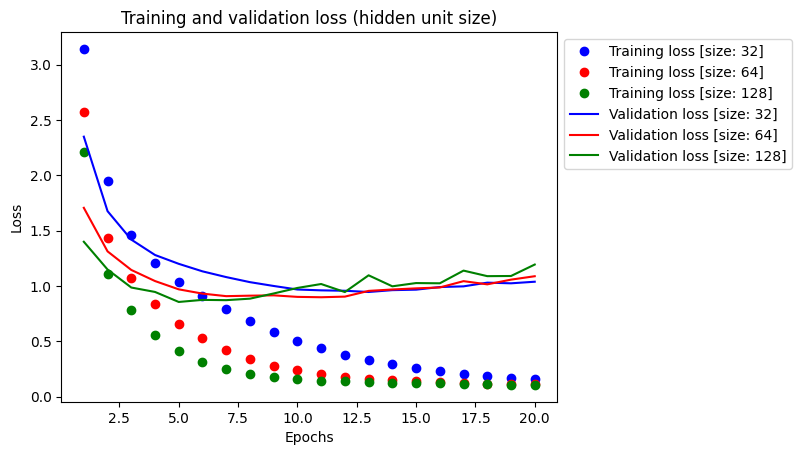

In [9]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

loss_1 = history_1.history['loss']
loss_2 = history_2.history['loss']
loss_3 = history_3.history['loss']
val_loss_1 = history_1.history['val_loss']
val_loss_2 = history_2.history['val_loss']
val_loss_3 = history_3.history['val_loss']

epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, loss_1, 'bo', label='Training loss [size: 32]')
plt.plot(epochs, loss_2, 'ro', label='Training loss [size: 64]')
plt.plot(epochs, loss_3, 'go', label='Training loss [size: 128]')

plt.plot(epochs, val_loss_1, 'b', label='Validation loss [size: 32]')
plt.plot(epochs, val_loss_2, 'r', label='Validation loss [size: 64]')
plt.plot(epochs, val_loss_3, 'g', label='Validation loss [size: 128]')

plt.title('Training and validation loss (hidden unit size)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

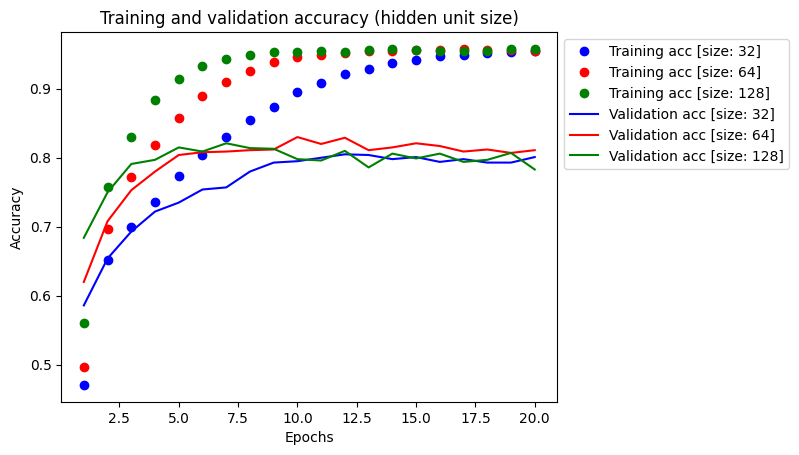

In [10]:
# 훈련과 검증 정확도 그리기
plt.clf()

acc_1 = history_1.history['accuracy']
acc_2 = history_2.history['accuracy']
acc_3 = history_3.history['accuracy']
val_acc_1 = history_1.history['val_accuracy']
val_acc_2 = history_2.history['val_accuracy']
val_acc_3 = history_3.history['val_accuracy']

plt.plot(epochs, acc_1, 'bo', label='Training acc [size: 32]')
plt.plot(epochs, acc_2, 'ro', label='Training acc [size: 64]')
plt.plot(epochs, acc_3, 'go', label='Training acc [size: 128]')

plt.plot(epochs, val_acc_1, 'b', label='Validation acc [size: 32]')
plt.plot(epochs, val_acc_2, 'r', label='Validation acc [size: 64]')
plt.plot(epochs, val_acc_3, 'g', label='Validation acc [size: 128]')

plt.title('Training and validation accuracy (hidden unit size)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()